# Complete Regression - Lab

## Introduction
By now, you have created all the necessary functions to calculate the slope, intercept, best-fit line, prediction and visualizations. In this lab you will put them all together to run a regression experiment and calculate the model loss. 

## Objectives

You will be able to:

* Run a complete regression analysis using python

## The formulas

** Slope**: 
$\hat m = \dfrac{\overline{x}*\overline{y}-\overline{xy}}{(\overline{x})^2-\overline{x^2}}$


**Intercept**: $ \hat c = \bar{y} - \hat m\bar{x}$

**Prediction**: $\hat{y} = \hat mx + \hat c$

** R-Squared**: 
$ R^2 = 1- \dfrac{SS_{RES}}{SS_{TOT}} = \dfrac{\sum_i(y_i - \hat y_i)^2}{\sum_i(y_i - \overline y_i)^2} $


Use the python functions created earlier to implement these formulas to run a regression analysis using x and y as input variables. 

In [13]:

# Combine all the functions created so far to run a complete regression experiment. 
# Produce an output similar to the one shown below. 

X = np.array([1,2,3,4,5,6,7,8,9,10], dtype=np.float64)
Y = np.array([7,7,8,9,9,10,10,11,11,12], dtype=np.float64)


In [38]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
style.use('ggplot')
%matplotlib inline


def calc_slope(xs,ys):
    m = (np.mean(xs)*np.mean(ys) - np.mean(xs*ys)) / ((np.mean(xs)**2) - (np.mean(xs**2)))
    return m


def best_fit(xs,ys):
    m = calc_slope(xs,ys)
    c = np.mean(ys) - (m*np.mean(xs))
    return c


def reg_line(m, c, xs):
    regression_line = [(m*x)+c for x in xs]
    return regression_line


def sq_err(y_a, y_b):
    sq_errors = []
    for i in range(0,len(y_a)):
        sq_errors.append((y_a[i] - y_b[i])**2)
    return sum(sq_errors)


def r_squared(y_real, y_predicted):
    y_mean = np.full((len(y_real)), np.mean(y_real))
    TSS = sq_err(y_real, y_mean)
    RSS = sq_err(y_real, y_predicted)
    return 1 - (RSS/TSS) 


In [39]:
def reg_analysis(x_data, y_data):
    m = calc_slope(x_data, y_data)
    c = best_fit(x_data, y_data)
    y_predicted = reg_line(m, c, x_data)
    r_2 = r_squared(y_data, y_predicted)
    print("Basic Regression Diagnostics\n----------------------------\nSlope: ", m, "\nY-Intercept: ", c, "\nR-Squared: ", r_2, "\n----------------------------\nModel: Y = ", m," * X + ",c)
    plt.scatter(X,Y, color='black', label="Data")
    plt.plot(X, y_predicted, label="Regression Line")
    plt.legend(loc=4)
    plt.show()
    return m, c

Basic Regression Diagnostics
----------------------------
Slope:  0.5575757575757568 
Y-Intercept:  6.3333333333333375 
R-Squared:  0.9715335169880626 
----------------------------
Model: Y =  0.5575757575757568  * X +  6.3333333333333375


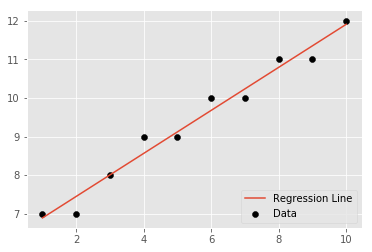

(0.5575757575757568, 6.3333333333333375)

In [40]:
reg_analysis(X,Y)

Basic Regression Diagnostics
----------------------------
Slope: 0.56
Y-Intercept: 6.33
R-Squared: 0.97
----------------------------
Model: Y = 0.56 * X + 6.33


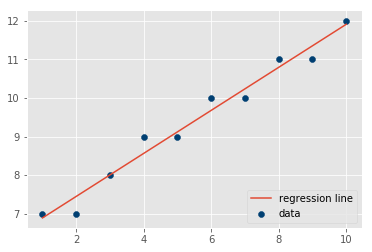

In [70]:
# Basic Regression Diagnostics
# ----------------------------
# Slope: 0.56
# Y-Intercept: 6.33
# R-Squared: 0.97
# ----------------------------
# Model: Y = 0.56 * X + 6.33

## Make Predictions

Predict and plot the value of y using regression line above for a new value of $x = 4.5$.

In [41]:
# Make prediction using given value and visualize on the scatter plot
def reg_analysis_with_new_x(x_data, y_data, new_x):
    m = calc_slope(x_data, y_data)
    c = best_fit(x_data, y_data)
    y_predicted = reg_line(m, c, x_data)
    new_y = m*new_x + c
    r_2 = r_squared(y_data, y_predicted)
    plt.scatter(X,Y, color='black', label="Data")
    plt.plot(X, y_predicted, label="Regression Line")
    plt.scatter(new_x, new_y, color='orange', label='Prediction: '+ str(np.round(new_y,1)))
    plt.legend(loc=4)
    plt.show()

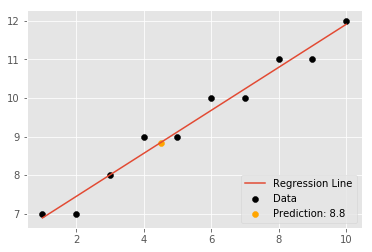

In [42]:
reg_analysis_with_new_x(X,Y,4.5)

## Level up - Optional 
Load the "`heightweight.csv`" dataset. Use the height as an independent and weight as a dependent variable and draw a regression line to data using your code above. Calculate your R-Squared value for the model and try to predict new values of y. 

## Summary

In this lab, we ran a complete simple regression analysis experiment using functions created so far. Next up, you'll learn how you can use python's built-in modules to perform similar analyses with a much higher level of sophistication. 

In [46]:
import pandas as pd
df = pd.read_csv('heightweight.csv')
display(df.head())
df.info()

,height,weight
0,68,165
1,71,201
2,61,140
3,69,170
4,71,192


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 2 columns):
height    20 non-null int64
weight    20 non-null int64
dtypes: int64(2)
memory usage: 400.0 bytes


In [57]:
X = df.height
Y = df.weight

Basic Regression Diagnostics
----------------------------
Slope:  5.539019232705614 
Y-Intercept:  -204.48343570637024 
R-Squared:  0.9553099288673668 
----------------------------
Model: Y =  5.539019232705614  * X +  -204.48343570637024


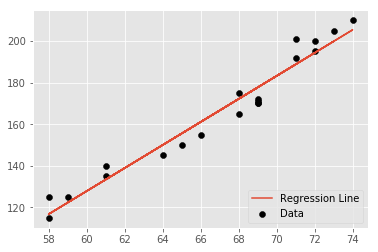

(5.539019232705614, -204.48343570637024)

In [58]:
reg_analysis(X,Y)

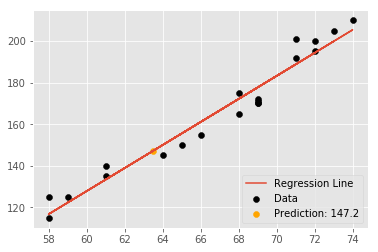

In [60]:
reg_analysis_with_new_x(X,Y,63.5)